# YOLO tutorial
- v3, v5, v8 버전연습

## 01. 환경설정
- 구글 드라이브 연결부터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 02-1. 작업할 폴더로 이동

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolo_amr/OD(ObjectDetection)

/content/drive/MyDrive/Colab Notebooks/yolo_amr/OD(ObjectDetection)


In [ ]:
# yolo 폴더 확인
!ls

01_yolo_tutorial.ipynb	   datasets		ultralytics  yolov5
02_yolo_pythonbasic.ipynb  dev_yolo_test.ipynb	yolov3


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.2/530.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 16.7 MB/s eta 0:00:00


## 모델 불러오기

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n-pose.pt")

100%|██████████| 6.49M/6.49M [00:00<00:00, 76.1MB/s]


In [ ]:
!ls

01_yolo_tutorial.ipynb	   dev_yolo_test.ipynb	yolov3		 yolov8n.pt
02_yolo_pythonbasic.ipynb  test.jpg		yolov5
datasets		   ultralytics		yolov8n-pose.pt


## 모델에 전처리해서 넣어보기

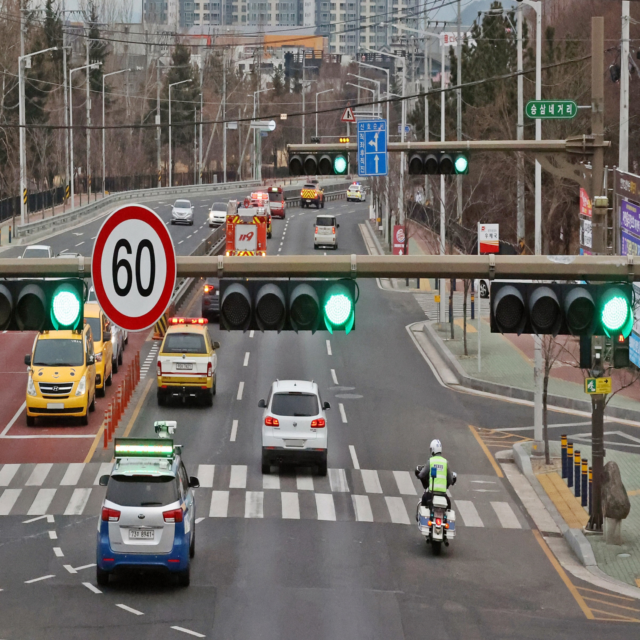

In [ ]:
from PIL import Image
image = Image.open('test.jpg').resize((640, 640), resample=Image.BILINEAR)
image

## 결과들
사람라벨인덱스: 입력이미지사이즈 1명의 사람, 추론시간  
전체속도: 전처리시간 추론시간 후처리시간 (입력이미지모양)

In [ ]:
result = model(image)[0]


0: 640x640 1 person, 32.1ms
Speed: 0.7ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


boxes: 이미지에서 감지된 객체에 대해 예측된 경계 상자를 포함하는 "ultralytics.yolo.engine.results.Boxes" 객체입니다.  
keypoints: 이미지에서 감지된 객체에 대해 예측된 키 포인트를 포함하는 텐서입니다.  
names: 클래스 인덱스를 해당 이름에 매핑하는 사전입니다.  
orig_img: 원본 이미지 배열입니다.  
orig_shape: 이미지의 원래 모양입니다.  
path: 이미지 파일의 경로입니다.  
speed: YOLO 객체 검출 프로세스의 다양한 단계에 소요된 시간이 포함된 사전입니다.  

In [ ]:
result

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: tensor([[[4.3301e+02, 4.5107e+02, 1.4298e-01],
         [4.3346e+02, 4.4877e+02, 1.1108e-01],
         [4.3340e+02, 4.4865e+02, 6.5493e-02],
         [4.3241e+02, 4.5038e+02, 6.7954e-01],
         [4.4141e+02, 4.5009e+02, 4.8328e-01],
         [4.2777e+02, 4.6175e+02, 9.7069e-01],
         [4.4639e+02, 4.6157e+02, 9.6267e-01],
         [4.2301e+02, 4.7687e+02, 8.7313e-01],
         [4.5078e+02, 4.7658e+02, 7.9840e-01],
         [4.2453e+02, 4.8563e+02, 6.7217e-01],
         [4.4866e+02, 4.8428e+02, 5.7031e-01],
         [4.3005e+02, 4.9103e+02, 9.7680e-01],
         [4.4344e+02, 4.9103e+02, 9.7417e-01],
         [4.2590e+02, 5.0753e+02, 9.2888e-01],
         [4.4538e+02, 5.0783e+02, 9.1324e-01],
         [4.2412e+02, 5.2581e+02, 8.5671e-01],
         [4.4830e+02, 5.2580e+02, 8.3645e-01]]], device='cuda:0')
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'p

boxes: 경계 상자 좌표를 [x1, y1, x2, y2, confidence, class] 형식으로 나타내는 텐서입니다.  
cls: 경계 상자에 대한 클래스 예측을 나타내는 텐서입니다.  
conf: 경계 상자 예측의 신뢰도 점수를 나타내는 텐서입니다.  
data: [x1, y1, x2, y2, confidence, class] 형식의 경계 상자 좌표를 나타내는 텐서입니다.  
id: 개체의 식별자(있는 경우)  
is_track: 개체가 추적되고 있는지 여부를 나타내는 부울입니다  
orig_shape: 입력 이미지의 원래 모양을 나타내는 텐서  
shape: 경계 상자 텐서의 모양  
xywh: [x_center, y_center, 너비, 높이] 형식으로 경계 상자 좌표를 나타내는 텐서  
xywhn: 정규화된 경계 상자 좌표를 [x_center, y_center, 너비, 높이] 형식으로 나타내는 텐서입니다.  
xyxy: [x1, y1, x2, y2] 형식의 경계 상자 좌표를 나타내는 텐서입니다.  
xyxyn: 정규화된 경계 상자 좌표를 [x1, y1, x2, y2] 형식으로 나타내는 텐서입니다.  

In [ ]:
result.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[416.0000, 439.0000, 457.0000, 535.0000,   0.7043,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.7043], device='cuda:0')
data: tensor([[416.0000, 439.0000, 457.0000, 535.0000,   0.7043,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([640, 640], device='cuda:0')
shape: torch.Size([1, 6])
xywh: tensor([[436.5000, 487.0000,  41.0000,  96.0000]], device='cuda:0')
xywhn: tensor([[0.6820, 0.7609, 0.0641, 0.1500]], device='cuda:0')
xyxy: tensor([[416., 439., 457., 535.]], device='cuda:0')
xyxyn: tensor([[0.6500, 0.6859, 0.7141, 0.8359]], device='cuda:0')

In [ ]:
result.keypoints

tensor([[[4.3301e+02, 4.5107e+02, 1.4298e-01],
         [4.3346e+02, 4.4877e+02, 1.1108e-01],
         [4.3340e+02, 4.4865e+02, 6.5493e-02],
         [4.3241e+02, 4.5038e+02, 6.7954e-01],
         [4.4141e+02, 4.5009e+02, 4.8328e-01],
         [4.2777e+02, 4.6175e+02, 9.7069e-01],
         [4.4639e+02, 4.6157e+02, 9.6267e-01],
         [4.2301e+02, 4.7687e+02, 8.7313e-01],
         [4.5078e+02, 4.7658e+02, 7.9840e-01],
         [4.2453e+02, 4.8563e+02, 6.7217e-01],
         [4.4866e+02, 4.8428e+02, 5.7031e-01],
         [4.3005e+02, 4.9103e+02, 9.7680e-01],
         [4.4344e+02, 4.9103e+02, 9.7417e-01],
         [4.2590e+02, 5.0753e+02, 9.2888e-01],
         [4.4538e+02, 5.0783e+02, 9.1324e-01],
         [4.2412e+02, 5.2581e+02, 8.5671e-01],
         [4.4830e+02, 5.2580e+02, 8.3645e-01]]], device='cuda:0')

In [ ]:
result.names

{0: 'person'}

In [ ]:
result.orig_img

array([[[140, 149, 153],
        [147, 154, 159],
        [142, 149, 156],
        ...,
        [ 40,  43,  60],
        [ 39,  43,  60],
        [ 41,  46,  62]],

       [[127, 136, 143],
        [145, 152, 158],
        [143, 151, 159],
        ...,
        [ 58,  63,  77],
        [ 51,  57,  70],
        [ 49,  56,  70]],

       [[126, 136, 143],
        [137, 145, 152],
        [138, 146, 156],
        ...,
        [ 68,  74,  91],
        [ 61,  68,  84],
        [ 58,  66,  82]],

       ...,

       [[ 94, 101, 104],
        [ 99, 105, 108],
        [107, 111, 118],
        ...,
        [ 88,  92,  96],
        [ 89,  92,  95],
        [ 90,  94,  95]],

       [[ 95,  99, 103],
        [ 97, 100, 106],
        [ 98, 101, 107],
        ...,
        [ 91,  94,  97],
        [ 89,  93,  94],
        [ 87,  91,  92]],

       [[134, 136, 141],
        [128, 131, 135],
        [123, 127, 130],
        ...,
        [ 92,  94,  96],
        [ 87,  91,  91],
        [ 85,  89,  90]]

In [ ]:
result.orig_shape

(640, 640)

In [ ]:
result.path

'image0.jpg'

In [ ]:
result.speed

{'preprocess': 0.7257461547851562,
 'inference': 32.0734977722168,
 'postprocess': 2.076864242553711}

## 네모를 그려보자

In [56]:
import cv2
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread('test.jpg')

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (0, 0, 255) # BGR color format
thickness = 2

result = model(image)[0]
# Get the bounding box coordinates of the detected person
boxes = result.boxes.boxes
print(boxes)
for box in boxes :
  x1, y1, x2, y2,c,idx = box
  # Draw a rectangle around the detected person
  cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
  # Add the text to the image
  cv2.putText(image, result.names[int(idx)], (int(x1), int(y1)-10), font, font_scale, color, thickness)

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 448x640 1 person, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


tensor([[1.5620e+03, 1.0920e+03, 1.7050e+03, 1.3300e+03, 4.4720e-01, 0.0000e+00]], device='cuda:0')
